### Model Training - Linear Regression

Multivariable regression is similar to a linear regression, however instead of a single independent variable, multiple are given to predict a single dependent variable, allowing for a more precise depiciton of the relationships between variables

- Y = w0 + w1X1 + w2X2 + ... + wpXp

The following is an example of mutlivariable regression equation, the X1 and X2 are the different input or independent features. W is the weight of the each independent variable (The coefficient) the higher the weight, the more influence it has on the regression. Jupyter notebook calculates this automatically.

- What was found out later was because of this, multivariable works best when you provide it with all input features, as even if an input feature has little correlation, all that happens is it's weight is diminished


- I will not be doing multiple tests using different features as the results have mirrored the House (A) results

#### Step 1

Load the required dependencies

In [24]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

#### Step 2. 

Store the data columns for multivariable regression

- This is the same process as linear regression, however now multiple input features can be input, allowing for more a more precise prediction

- I have included more features as multivariable regression rewards you for inputting more features as it automatically weights input features so there is no penalty to giving more features

- While it does increase training times it is marginal

In [25]:
# Create a data frame from the csv file
training_data = pd.read_csv('training_data/B_training_data_new_2.csv')

x_name = ['num_bed', 'num_bath', 'property_size', 'value_score', 'tot_rooms', 'suburb_median_income', 'suburb_lat', 'suburb_lng', 'km_from_cbd', 'ds_float', 'num_parking' ]
y_name = 'Target'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

#### Step 3

Plot the x features and y data in seperate graphs, while labelling the column and graph title

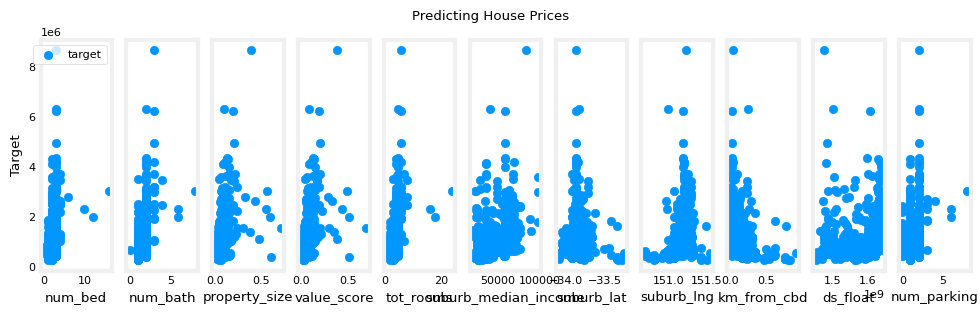

In [26]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("Predicting House Prices")
plt.show()

- As you can see at the moment there is little correlation between single features and the target. There is not one linear relationship within a single graph

#### Step 4

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [27]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

#### Step 5

Plot the features in independent graphs with the target, and the multivariable predictions

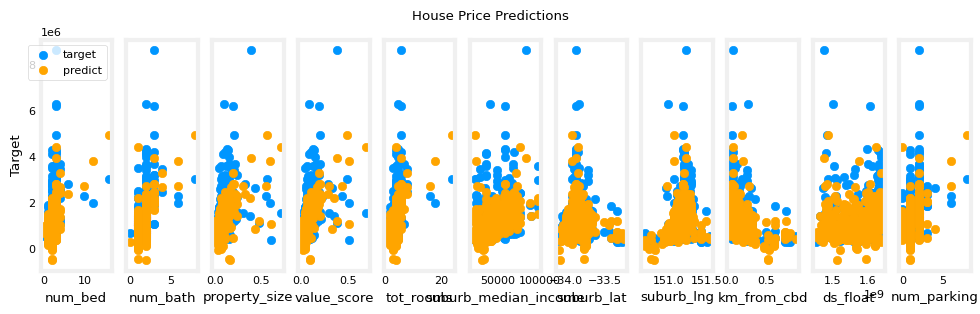

In [28]:
# scatter plot predictions and targets vs original features    
y_pred = my_model.predict(x)
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'target')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Target"); ax[0].legend();
fig.suptitle("House Price Predictions")
plt.show()

- As you can see there is predictions in orange are far off the target values when reduced to single graphs.

#### Step 6

Save the model to the disk

In [29]:
# save the model to disk
filename = 'B_MV_model_v7.sav'
pickle.dump(my_model, open('../Model_Testing_and_Validation/LinearRegression_Models/B/' + filename, 'wb'))